<a href="https://colab.research.google.com/github/Yonas-Berhe/WQU_MSFE_Capestone_project/blob/main/Group22__MSFE_Capestone_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --quiet wbgapi

In [ ]:
pip install --quiet yfinance

In [ ]:
pip install --quiet monthly_returns_heatmap

In [ ]:
pip install --quiet yahoofinancials

In [5]:
import numpy as np
import pandas as pd
import wbgapi as wb
import pandas_datareader.wb as pwb
import yfinance as yf
from yahoofinancials import YahooFinancials
import monthly_returns_heatmap as mrh
import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

# Getting Data

In [ ]:
indicators= pwb.get_indicators()
indicators

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of data from Nati...,Poverty
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
...,...,...,...,...,...,...,...
20060,w_F_skl,Annual wage for skilled female workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
20061,w_M_nsk,Annual wage for unskilled male workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
20062,w_M_skl,Annual wage for skilled male workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
20063,wpremia_F,Wage Premia for Females (the ratio of skilled ...,,Gender Disaggregated Labor Database (GDLD),,b'',


In [ ]:
countries = pwb.get_countries()
countries

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
294,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
295,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.3520
296,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460
297,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.3982


In [ ]:
indicators.loc[indicators.id =='NY.GDP.PETR.RT.ZS',:]

,id,name,unit,source,sourceNote,sourceOrganization,topics
10391,NY.GDP.PETR.RT.ZS,Oil rents (% of GDP),,World Development Indicators,Oil rents are the difference between the value...,"b""World Bank staff estimates based on sources ...",Energy & Mining ; Environment


# Exploratory Analaysis

•	Overview of the oil markets in emerging economies

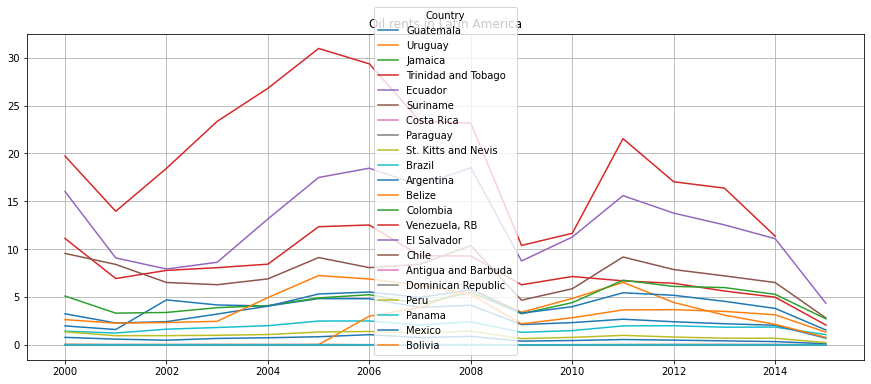

In [ ]:
wb.data.DataFrame('NY.GDP.PETR.RT.ZS',
                  economy=wb.region.members('BLA'),
                  time = range(2000,2016), numericTimeKeys=True,
                  labels=True).set_index('Country').transpose().plot(title='Oil rents in Latin America',figsize=(15,6))
plt.grid()

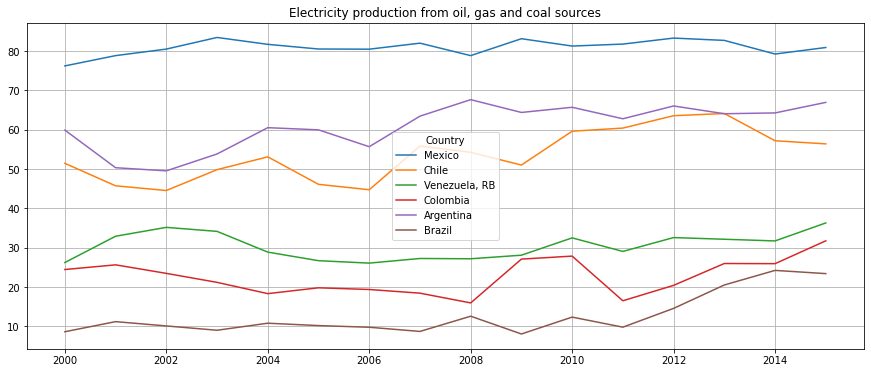

In [ ]:
wb.data.DataFrame('EG.ELC.FOSL.ZS',
                  ('BRA','ARG','COL','VEN','CHL','MEX'),
                  time = range(2000,2016), numericTimeKeys=True,
                  labels=True).set_index('Country').transpose().plot(title='Electricity production from oil, gas and coal sources',figsize=(15,6))
plt.grid()

•	production / top oil companies in each nation / market cap and volume of production

•	consumption

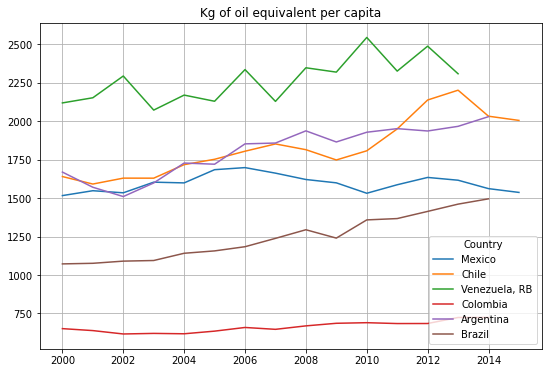

In [ ]:
wb.data.DataFrame('EG.USE.PCAP.KG.OE',
                  ('BRA','ARG','COL','VEN','CHL','MEX'),
                  time = range(2000,2016), numericTimeKeys=True,
                  labels=True).set_index('Country').transpose().plot(title='Kg of oil equivalent per capita',figsize=(9,6))
plt.grid()

Venezuela consumes more oil than any other countries among the countries that we considered

•	import and export volume

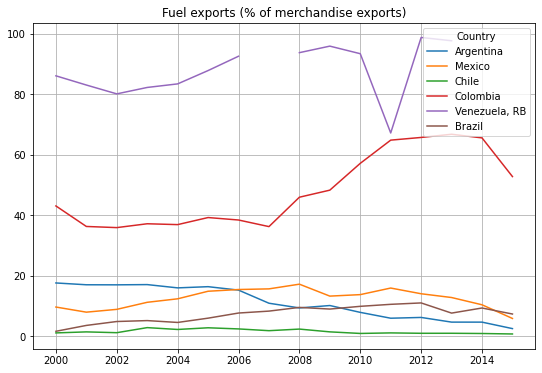

In [ ]:
wb.data.DataFrame('TX.VAL.FUEL.ZS.UN',
                  ('BRA','VEN','COL','CHL','MEX','ARG'),
                  time = range(2000,2016), numericTimeKeys=True,
                  labels=True).set_index('Country').transpose().plot(title='Fuel exports (% of merchandise exports)',figsize=(9,6))
plt.grid()

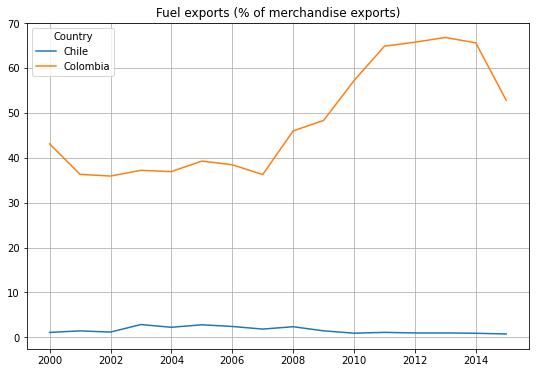

In [ ]:
wb.data.DataFrame('TX.VAL.FUEL.ZS.UN',
                  ('COL','CHL'),
                  time = range(2000,2016), numericTimeKeys=True,
                  labels=True).set_index('Country').transpose().plot(title='Fuel exports (% of merchandise exports)',figsize=(9,6))
plt.grid()

•	Oil revenues over the years

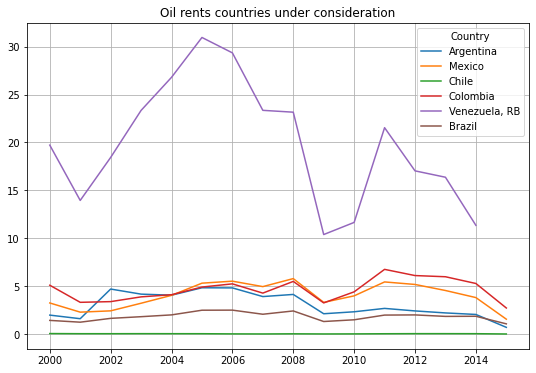

In [ ]:
wb.data.DataFrame('NY.GDP.PETR.RT.ZS',
                  ('BRA','VEN','COL','CHL','MEX','ARG'),
                  time = range(2000,2016), numericTimeKeys=True,
                  labels=True).set_index('Country').transpose().plot(title='Oil rents countries under consideration',figsize=(9,6))
plt.grid()

•	Investment in the oil sector over the years 

•	Basic statistical moments for all the variables overtime 

•	Determining net importers and net exports / selecting countries based on several factors including GDP

•	Correlation of oil prices with other macroeconomic variables over time

•	Distribution and volatility of oil prices

In [ ]:
oil_df = yf.download("CL=F", 
                      start='1970-01-01', 
                      end='2021-12-31', 
                      progress=True)
df = oil_df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
# We use Bokeh to visualize as it allows us to navigate the chart and toggle display interactively.
# For convenience in the subsequent part, we make this into a function so we can reuse it.

from bokeh.plotting import figure, show
from bokeh.models import CategoricalColorMapper, Legend, HoverTool
from bokeh.palettes import turbo
from bokeh.io import output_notebook
output_notebook()

def timeseriesplot(df, title, name):
    p = figure(width=600, height=400,
            x_axis_type="datetime", title=title,
            toolbar_location="below",
            tools="pan,box_zoom,wheel_zoom,reset")
    p.add_tools(HoverTool(formatters = {"$x":"datetime"},
                          tooltips=[("index", "$name"), ("date", "$x{%F}"), ("value", "$y{0.000}")]))
    p.grid.grid_line_alpha = 0.3
    legend = Legend(label_height=14, glyph_height=14, spacing=1, label_text_font_size='8pt')
    legend.click_policy="hide"
    p.add_layout(legend, 'right')
    p.yaxis.axis_label = name
    for col,color in zip(df.columns, turbo(len(df.columns))):
        p.line(df.index, df[col], legend_label=col, name=col, line_color=color)
    show(p)
    

timeseriesplot(df, "Position since "+df.index[0].strftime("%Y-%m-%d"),"Brent Crude Oil Price")

A baril closed at USD 145 on July 3, 2008. This is the highest price at which a barril has ever closed at. By december 2008 the price of a barril had plunged to USD 34. The financial crisis of 2007-08 was ongoing 

Another major shift in oil prices happens in March - April 2020 the price of crude oil decreased significantly and closed in negative territory, at USD 37.63 for the first time on April 20, 2020

IN 2011, fears of having the canal suez closed during protests in Egypt pushed the price above usd 100.

In 2016, oversupply of oil due to competitors pumping more oil than needed drove the price of a barril of oil below usd 30

In [ ]:
df.describe()

,Close
count,5362.000000
mean,62.147637
std,25.402146
min,-37.630001
25%,42.770000
50%,59.414999
75%,80.987499
max,145.289993


In [ ]:
df_daily_returns = np.log(df).diff(1).dropna()

timeseriesplot(df_daily_returns, "Position since "+df.index[0].strftime("%Y-%m-%d"),"Brent Crude Oil Daily returns")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


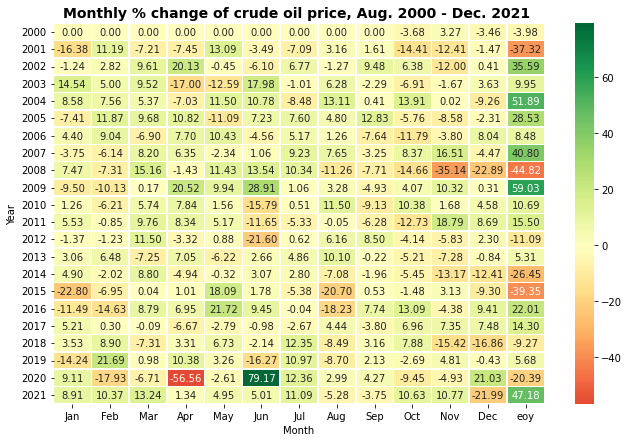

In [ ]:
df_monthly= df.asfreq('BMS',method='ffill').ffill()
df_monthly_pc = (df_monthly/df_monthly.shift(1)-1).dropna()
mrh.plot(df_monthly_pc,figsize = (11,7),title='Monthly % change of crude oil price, Aug. 2000 - Dec. 2021 ',eoy= True)

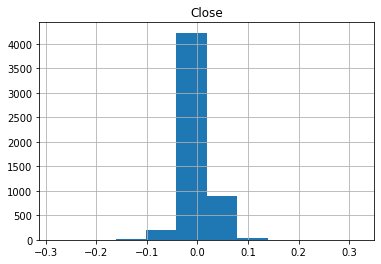

In [ ]:
from matplotlib import pyplot
df_daily_returns.hist()
pyplot.show()

•	Volatility of oil prices over the years / identifying shocks and explanation 

               Close
Date                
2021-12-09  0.348367
2021-12-10  0.348417
2021-12-13  0.348411
2021-12-14  0.348344
2021-12-15  0.348334
2021-12-16  0.348748
2021-12-17  0.349224
2021-12-20  0.350185
2021-12-21  0.352067
2021-12-22  0.352048
2021-12-23  0.352266
2021-12-27  0.352661
2021-12-28  0.352626
2021-12-29  0.352614
2021-12-30  0.352634


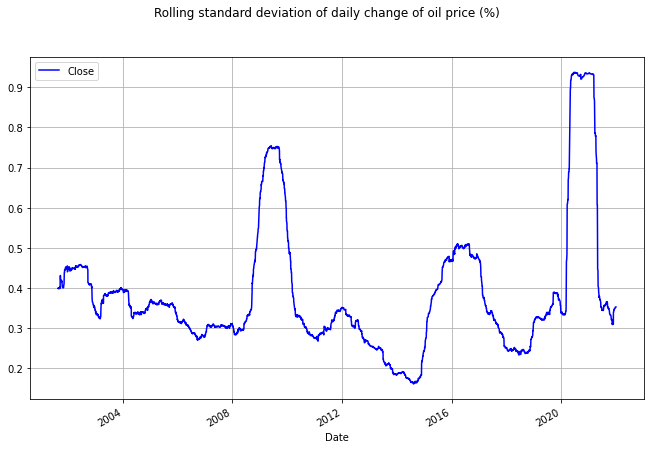

In [ ]:
# Compute Volatility using the pandas rolling standard deviation function
df_daily_ret_vol = df_daily_returns.rolling(window=252).std() * np.sqrt(252)
print(df_daily_ret_vol.tail(15))

# Plot 
df_daily_ret_vol.plot(subplots=True, color='blue',figsize=(11, 7),title='Rolling standard deviation of daily change of oil price (%)')
plt.grid()

the volatility as shown by the rolling standard deviation plot, increases at the end of 2008 to the beginning of 2009, 2016 and 2020

In 2008, the financial crisis of 2007-08 is ongoing
In 2020, there is an ongoing Covid 19 pandemic

•	Data visualization of relationships 

•	Net export calculations for the time period under consideration

80% of the exports in Venezuela are related to fuel according to the data fro World Bank.

The economy of Venezuela is highly dependent on oil as indicated by the different statistics that we explored

•	Determine which are net oil importing and net oil exporting countries  


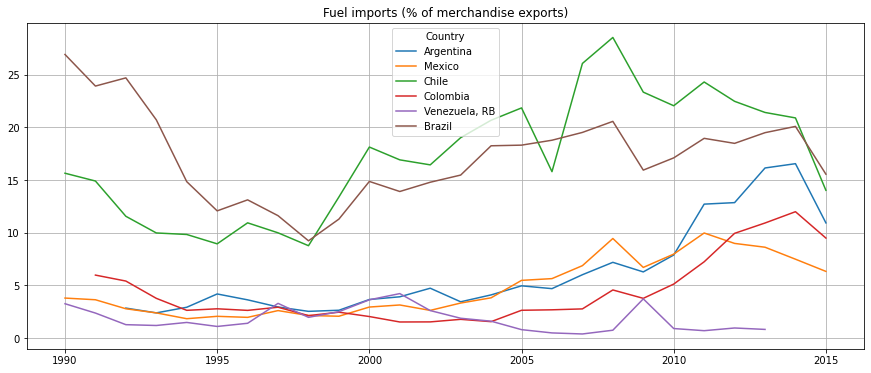

In [ ]:
wb.data.DataFrame('TM.VAL.FUEL.ZS.UN',
                  ('BRA','VEN','COL','CHL','MEX','ARG'),
                  time = range(1990,2016), numericTimeKeys=True,
                  labels=True).set_index('Country').transpose().plot(title='Fuel imports (% of merchandise exports)',figsize=(15,6))
plt.grid()

Chile is the main net importer among the countries considered, oil represents were at some point more than 20% of the total value of the imports. Venezuela is the most dependent on oil. The country had the highest oil rent as a % of GDP in all the years considered

We will, however, work with Colombia and Chile for our analysis as Colombia is also a net exporter of oil and much more data available for Colombia than for Venezuela


Inflation in Colombia and Chile

In [ ]:
start = datetime.datetime (2000, 8, 1)
end = datetime.datetime (2020, 6, 1)

df2 = pdr.DataReader('COLCPALTT01GPM', 'fred', start, end)

In [ ]:
timeseriesplot(df2, "Position since "+df.index[0].strftime("%Y-%m-%d"),"Colombia CPI monthly % change")

In [ ]:
start = datetime.datetime (2000, 7, 1)
end = datetime.datetime (2020, 6, 1)

CPI_Chile = pdr.DataReader('CHLCPIALLMINMEI', 'fred', start, end)
df3 = (CPI_Chile/CPI_Chile.shift(1)-1).dropna()

In [ ]:
timeseriesplot(df2, "Position since "+df3.index[0].strftime("%Y-%m-%d"),"Chile CPI monthly % change")

In [ ]:
timeseriesplot(df_monthly_pc, "Position since "+df.index[0].strftime("%Y-%m-%d"),"monthly change of oil prices")



In [ ]:
df_monthly_pc

,close
Date,
2000-10-02,-0.036848
2000-11-01,0.032659
2000-12-01,-0.034639
2001-01-01,-0.163807
2001-02-01,0.111940
...,...
2021-08-02,-0.052772
2021-09-01,-0.037469
2021-10-01,0.106284


In [ ]:
df4 = pd.concat((df2, df3,df_monthly_pc),axis=1)
df4

,COLCPALTT01GPM,CHLCPIALLMINMEI,close
2000-08-01,0.305523,0.002584,NaN
2000-09-01,0.421743,0.006083,NaN
2000-10-01,0.163322,0.006046,NaN
2000-10-02,NaN,NaN,-0.036848
2000-11-01,0.326112,0.003382,0.032659
...,...,...,...
2021-08-02,NaN,NaN,-0.052772
2021-09-01,NaN,NaN,-0.037469
2021-10-01,NaN,NaN,0.106284
2021-11-01,NaN,NaN,0.107670


Text(0.5, 1.0, 'Correlation Matrix')

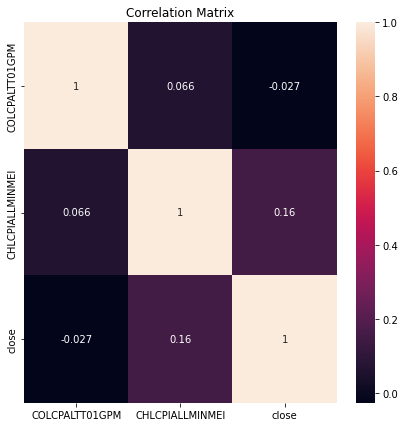

In [ ]:
#first, Pearson correlation matrix
pearson_corr= df4.corr()

f, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(pearson_corr,annot=True)
plt.title('Correlation Matrix')

In [ ]:
oil_df = yf.download("EC", 
                      start='1970-01-01', 
                      end='2021-12-31', 
                      progress=True)
df7 = oil_df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
timeseriesplot(df7, "Position since "+df7.index[0].strftime("%Y-%m-%d"),"Ecopetrol Stock Price")

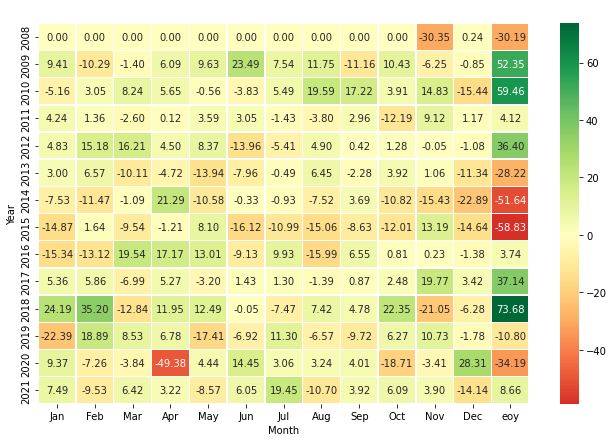

In [ ]:
df7_monthly= df7.asfreq('BMS',method='ffill').ffill()
df7_monthly_pc = (df7_monthly/df7_monthly.shift(1)-1).dropna()
mrh.plot(df7_monthly_pc,figsize = (11,7),title=' ',eoy= True)

Text(0.5, 1.0, 'Correlation Matrix')

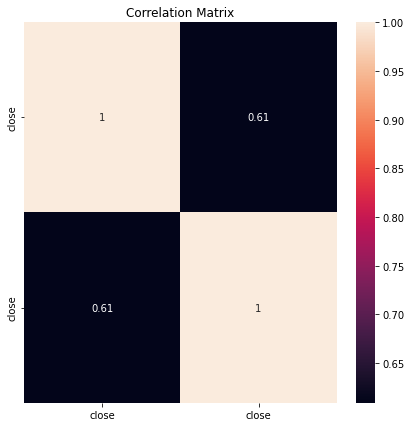

In [ ]:
df5 = pd.concat((df7_monthly_pc,df_monthly_pc),axis=1)
#first, Pearson correlation matrix
pearson_corr= df5.corr()

f, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(pearson_corr,annot=True)
plt.title('Correlation Matrix')

# Long-run relationship analysis

*Importing Libraries*

In [ ]:
pip install --quiet wbgapi

In [ ]:
pip install --quiet yfinance

In [ ]:
pip install --quiet yahoofinancials

In [ ]:

import numpy as np
import pandas as pd
import wbgapi as wb
import pandas_datareader.wb as pwb
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas_datareader as pdr
import datetime
import bokeh
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.preprocessing import MinMaxScaler


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


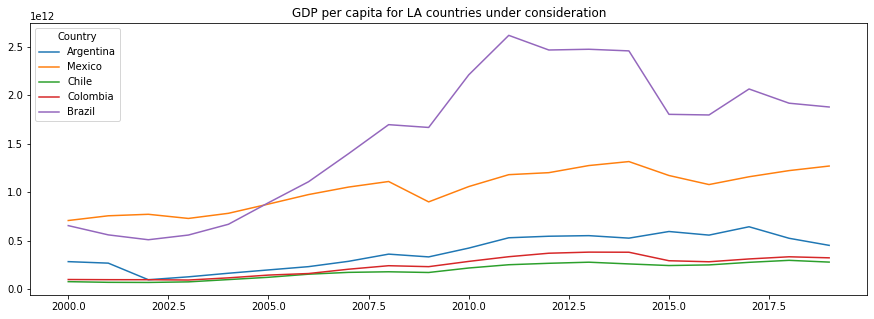

In [ ]:
# visuliazing GDPPC for the selected LA countries 

wb.data.DataFrame('NY.GDP.MKTP.CD',
                  ('BRA','COL','CHL','MEX','ARG'),
                  time = range(2000,2020), numericTimeKeys=True, 
                  labels=True).set_index('Country').transpose().plot(title='GDP per capita for LA countries under consideration', figsize=(15,5))

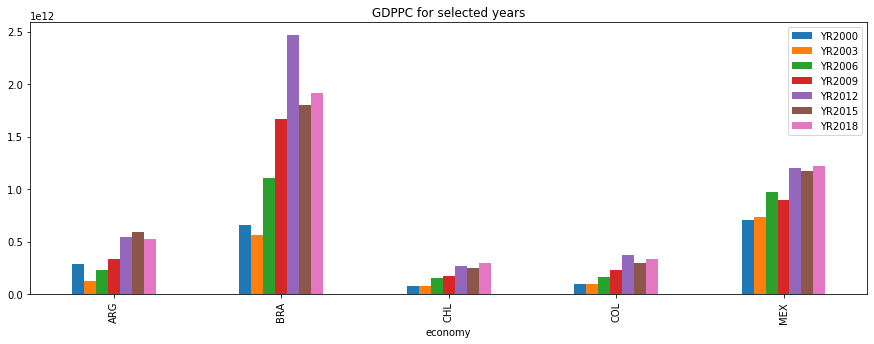

In [ ]:

gdppercap = wb.data.DataFrame('NY.GDP.MKTP.CD',
                  ['BRA','COL','CHL','MEX','ARG'],
                  time=range(2000,2020,3))

gdppercap.plot.bar(figsize=(15,5), title = 'GDPPC for selected years')

In [ ]:
# importing oil price data
# aggregated by years



oil_df = yf.download("CL=F", 
                      start='2000-09-23', 
                      end='2020-01-01', 
                      progress=True)

oil_prices = oil_df[['Close']].resample('Y').mean().dropna()
oil_prices.reset_index().dropna()
oil_prices.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2000-12-31,31.843731
2001-12-31,25.960405
2002-12-31,26.150440
2003-12-31,30.994400
2004-12-31,41.469076


In [ ]:
oil_prices1 = oil_prices.copy()

oil_prices1.index = pd.date_range("2000-01-01", periods=20, freq="Y")
oil_prices1.index.names = ['Date']
oil_prices1 = oil_prices1.rename(columns={'Close': 'Oil_price'})
#oil_prices1.head()

In [ ]:
# visuliazing annula oil prices from 2000

from bokeh.plotting import figure, show
from bokeh.models import CategoricalColorMapper, Legend, HoverTool
from bokeh.palettes import turbo
from bokeh.io import output_notebook
output_notebook()

def timeseriesplot(df, title, name):
    p = figure(width=800, height=400,
            x_axis_type="datetime", title=title,
            toolbar_location="below",
            tools="pan,box_zoom,wheel_zoom,reset")
    p.add_tools(HoverTool(formatters = {"$x":"datetime"},
                          tooltips=[("index", "$name"), ("date", "$x{%F}"), ("value", "$y{0.000}")]))
    p.grid.grid_line_alpha = 0.3
    legend = Legend(label_height=14, glyph_height=14, spacing=1, label_text_font_size='8pt')
    legend.click_policy="hide"
    p.add_layout(legend, 'right')
    p.yaxis.axis_label = name
    for col,color in zip(df.columns, turbo(len(df.columns))):
        p.line(df.index, df[col], legend_label=col, name=col, line_color=color)
    show(p)
    

timeseriesplot(oil_prices1, "Position since "+oil_prices1.index[0].strftime("%Y-%m-%d"),"Crude Oil Price")

# Analysis of Colombia

Importing data

In [ ]:
# GDP per capita data for colombia

# NY.GDP.PCAP.CD	GDP per capita (current US$)


Gdppc_df = wb.data.DataFrame('NY.GDP.PCAP.CD',
                  ('COL'),
                  time = range(2000,2020), numericTimeKeys=True, 
                  labels=True).set_index('Country').transpose()

Gdppc_df.index = pd.date_range("2000-01-01", periods=20, freq="Y")
Gdppc_df = Gdppc_df.rename(columns={'Colombia': 'GDPPC'})
Gdppc_df.index.names = ['Date']
Gdppc_df.head()

Country,GDPPC
Date,
2000-12-31,2520.481089
2001-12-31,2439.682456
2002-12-31,2396.627127
2003-12-31,2281.401762
2004-12-31,2782.623185


In [ ]:
# combining GDPPC and Oil price data in one dataframe

Colombia_df = pd.concat([Gdppc_df, oil_prices1], axis=1)
Colombia_df.dropna()
Colombia_df.index.name='Date'
Colombia_df.tail()

,GDPPC,Oil_price
Date,,
2015-12-31,6175.876030,48.761349
2016-12-31,5870.777957,43.435800
2017-12-31,6376.706716,50.853267
2018-12-31,6729.583332,64.947450
2019-12-31,6424.979492,57.041825


Exploring Data

In [ ]:
# Exploring data
Colombia_df.describe()

,GDPPC,Oil_price
count,20.000000,20.000000
mean,5229.448586,61.925919
std,2062.645075,24.954013
min,2281.401762,25.960405
25%,3256.504665,42.944119
50%,5671.657244,59.567956
75%,6501.130452,82.934107
max,8218.347844,99.751541


In [ ]:
# scaling data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Colombia_df_scaled = Colombia_df.copy()

Colombia_df_scaled[['GDPPC', 'Oil_price']] = scaler.fit_transform(Colombia_df_scaled[['GDPPC', 'Oil_price']])

Colombia_df_scaled.head()

,GDPPC,Oil_price
Date,,
2000-12-31,0.040270,0.079729
2001-12-31,0.026660,0.000000
2002-12-31,0.019408,0.002575
2003-12-31,0.000000,0.068220
2004-12-31,0.084424,0.210170


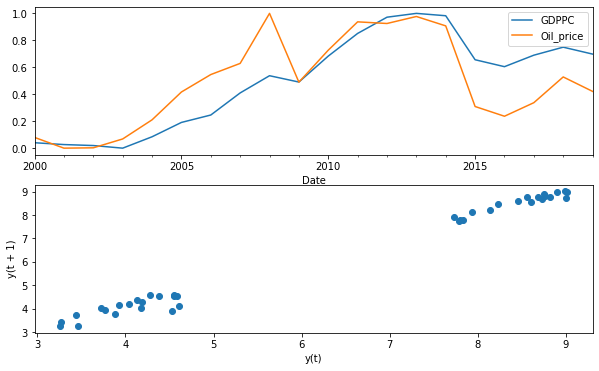

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
Colombia_df_scaled.plot(ax = ax1)
pd.plotting.lag_plot(Colombia_df_scaled) 
plt.show()

In [ ]:
# taking the log or the natual logrithms of the data

Colombia_df_log = np.log(Colombia_df)

Examining long and short run relationship

In [ ]:
# Linear regression 

reg1 = 'GDPPC ~ Oil_price'

reg1ouput = smf.ols(reg1, Colombia_df_log).fit()

print(reg1ouput.summary())

                            OLS Regression Results                            
Dep. Variable:                  GDPPC   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     39.48
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           6.34e-06
Time:                        11:19:09   Log-Likelihood:               -0.37070
No. Observations:                  20   AIC:                             4.741
Df Residuals:                      18   BIC:                             6.733
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0566      0.547      9.245      0.0

In [ ]:
# Test of stationarity

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
# testing residuals for statioanarity

adf_test(reg1ouput.resid)

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.225704
p-value                  0.662442
# lags used              8.000000
# observations          11.000000
critical value (1%)     -4.223238
critical value (5%)     -3.189369
critical value (10%)    -2.729839
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
#Granger causality

maxlag = 3
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(Colombia_df, variables = Colombia_df_scaled.columns)

,GDPPC_x,Oil_price_x
GDPPC_y,1.0,0.0227
Oil_price_y,0.0,1.0000


In [ ]:
adf_test(Colombia_df_log['GDPPC'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.130243e+00
p-value                 8.436064e-08
# lags used             8.000000e+00
# observations          1.100000e+01
critical value (1%)    -4.223238e+00
critical value (5%)    -3.189369e+00
critical value (10%)   -2.729839e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(Colombia_df_log['Oil_price'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.785477
p-value                  0.823351
# lags used              8.000000
# observations          11.000000
critical value (1%)     -4.223238
critical value (5%)     -3.189369
critical value (10%)    -2.729839
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
# Taking the first difference to make data stationary
Colombia_diff = Colombia_df_log.diff(2) 

In [ ]:
adf_test(Colombia_diff['GDPPC'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.698123e+00
p-value                 1.361969e-11
# lags used             7.000000e+00
# observations          1.000000e+01
critical value (1%)    -4.331573e+00
critical value (5%)    -3.232950e+00
critical value (10%)   -2.748700e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(Colombia_diff['Oil_price'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.602408e+01
p-value                 6.158848e-29
# lags used             7.000000e+00
# observations          1.000000e+01
critical value (1%)    -4.331573e+00
critical value (5%)    -3.232950e+00
critical value (10%)   -2.748700e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
#Initiate VAR model and selecting an optimal lag order

model = VAR(endog=Colombia_df_log)
res = model.select_order(5)
res.summary()

,AIC,BIC,FPE,HQIC
0,-5.283,-5.189,0.005078,-5.284
1,-8.459,-8.176,0.0002143,-8.462
2,-9.140,-8.668,0.0001131,-9.145
3,-8.900,-8.240,0.0001594,-8.907
4,-10.74,-9.893,3.136e-05,-10.75
5,-11.65*,-10.62*,1.952e-05*,-11.67*


In [ ]:
#Fit to a VAR model

model_fit = model.fit(maxlags=5)
#Print a summary of the model results
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jan, 2022
Time:                     11:03:55
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.6157
Nobs:                     15.0000    HQIC:                  -11.6652
Log likelihood:           66.8378    FPE:                1.95241e-05
AIC:                     -11.6541    Det(Omega_mle):     6.49841e-06
--------------------------------------------------------------------
Results for equation GDPPC
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                1.659271         1.443552            1.149           0.250
L1.GDPPC             1.767052         0.580853            3.042           0.002
L1.Oil_price        -0.913506         0.308745           -2.959 

In [ ]:
# Co-integration test

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(Colombia_df_log)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
GDPPC  ::  48.52     > 12.3212   =>   True
Oil_price ::  3.1       > 4.1296    =>   False


In [ ]:
# cointegration with trace test

import statsmodels

vec_rank1 = statsmodels.tsa.vector_ar.vecm.select_coint_rank(Colombia_df_log, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          26.75          23.15
  1   2          5.676          6.635
-------------------------------------


In [ ]:
# cointegration with maximum eigenvalue test

vec_rank2 = statsmodels.tsa.vector_ar.vecm.select_coint_rank(Colombia_df_log, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          21.08          21.75
-------------------------------------


In [ ]:
# Implementing the vector error correction model

model = VECM(Colombia_df_log, k_ar_diff=5, coint_rank=1)
vecm_res = model.fit()
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.GDPPC,2.4563,0.191,12.838,0.000,2.081,2.831
L1.Oil_price,-1.6674,0.156,-10.691,0.000,-1.973,-1.362
L2.GDPPC,2.5856,0.202,12.806,0.000,2.190,2.981
L2.Oil_price,-1.6080,0.131,-12.267,0.000,-1.865,-1.351
L3.GDPPC,-0.0492,0.138,-0.357,0.721,-0.320,0.221
L3.Oil_price,-0.3288,0.053,-6.243,0.000,-0.432,-0.226
L4.GDPPC,-2.2823,0.186,-12.245,0.000,-2.648,-1.917
L4.Oil_price,0.5921,0.046,12.928,0.000,0.502,0.682
L5.GDPPC,-0.9986,0.126,-7.925,0.000,-1.246,-0.752
L5.Oil_price,0.0579,0.046,1.258,0.208,-0.032,0.148


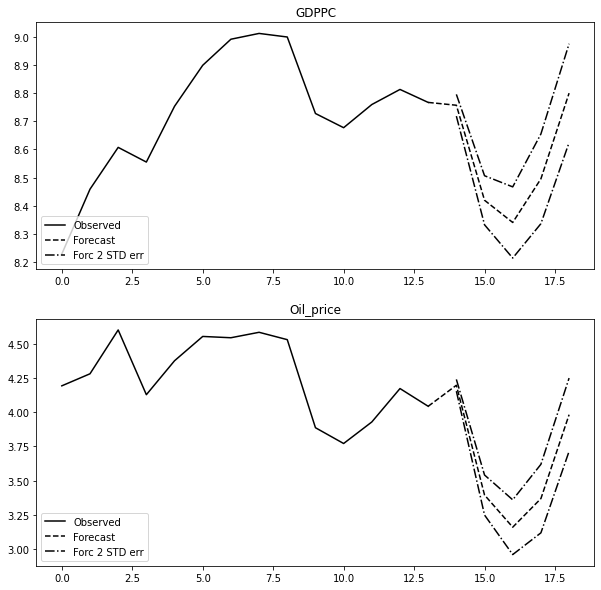

In [ ]:
# focasting for next five years

vecm_res.plot_forecast(steps=5)

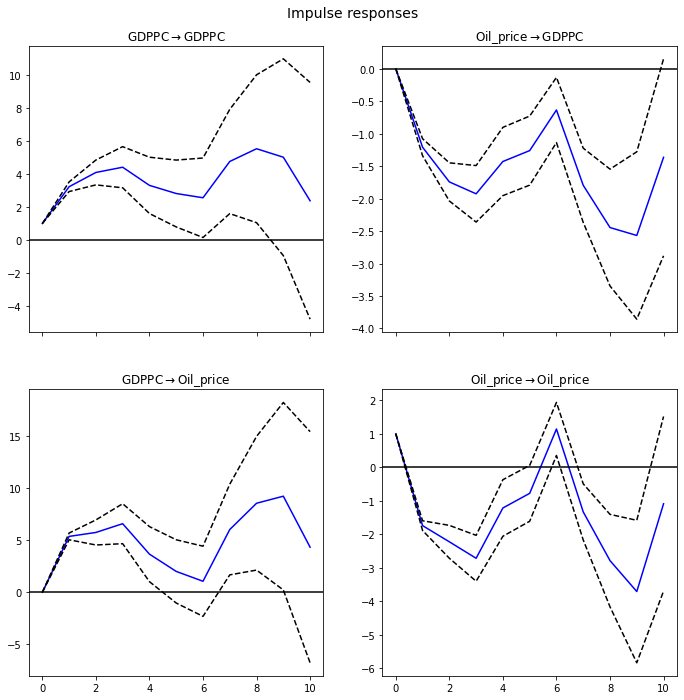

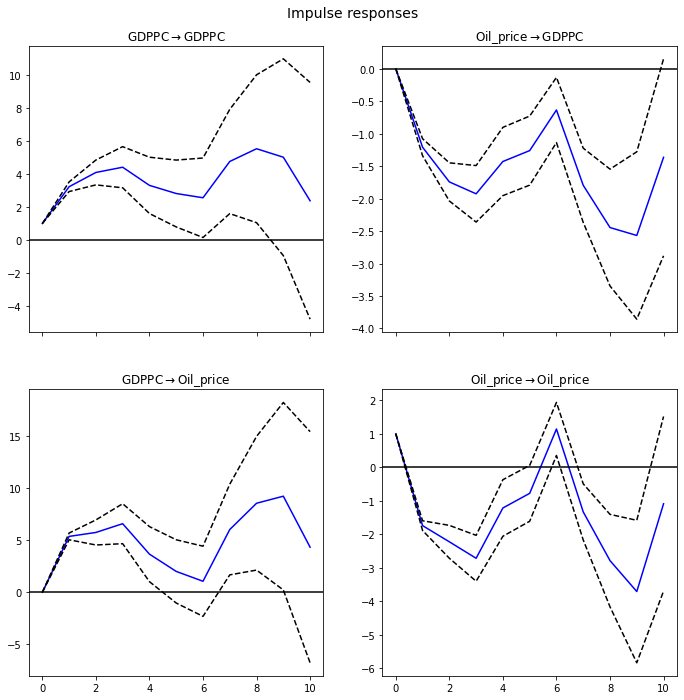

In [ ]:
# Impuluse respose functions 

vecm_res.irf().plot(orth=False)

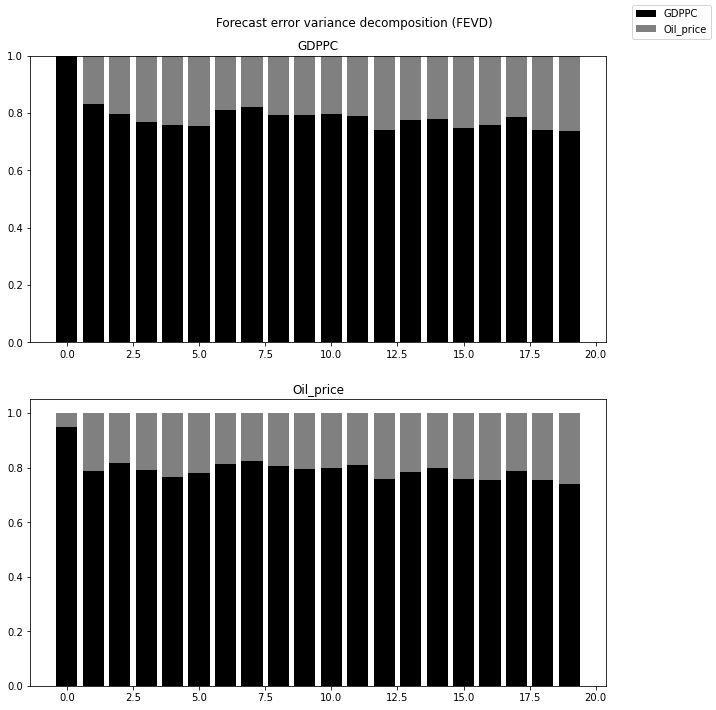

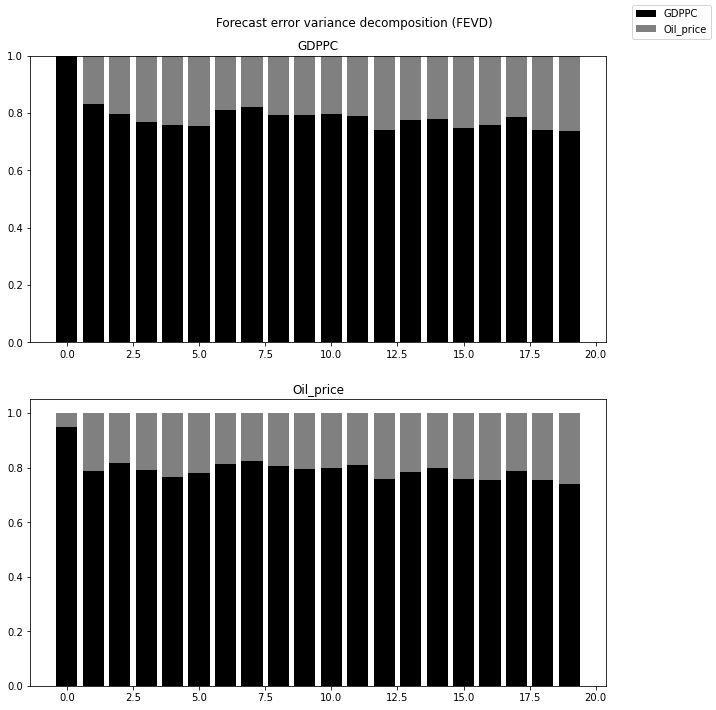

In [ ]:
model_fit.fevd(20).plot()


In [ ]:
#model_fit.test_normality().summary()
vecm_res.test_normality().summary()

Test statistic,Critical value,p-value,df
1.216,9.488,0.875,4


In [ ]:
vecm_res.test_whiteness().summary()

Test statistic,Critical value,p-value,df
56.11,28.87,0.000,18


*############################################*

# Analysis for Chile

In [ ]:
# GDP per capita data for Chile

# NY.GDP.PCAP.CD	GDP per capita (current US$)


Gdppc_df_Ch = wb.data.DataFrame('NY.GDP.PCAP.CD',
                  ('CHL'),
                  time = range(2000,2020), numericTimeKeys=True, 
                  labels=True).set_index('Country').transpose()

Gdppc_df_Ch.index = pd.date_range("2000-01-01", periods=20, freq="Y")
Gdppc_df_Ch = Gdppc_df_Ch.rename(columns={'Chile': 'GDPPC'})
Gdppc_df_Ch.index.names = ['Date']
Gdppc_df_Ch.head()

Country,GDPPC
Date,
2000-12-31,5074.902616
2001-12-31,4574.594716
2002-12-31,4446.249371
2003-12-31,4772.563723
2004-12-31,6194.852720


In [ ]:
# combining GDPPC and Oil price data in one dataframe

Chile_df = pd.concat([Gdppc_df_Ch, oil_prices1], axis=1)
Chile_df.dropna()
Chile_df.index.name='Date'
Chile_df.head()

,GDPPC,Oil_price
Date,,
2000-12-31,5074.902616,31.843731
2001-12-31,4574.594716,25.960405
2002-12-31,4446.249371,26.150440
2003-12-31,4772.563723,30.994400
2004-12-31,6194.852720,41.469076


In [ ]:
# scaling data 

scaler = MinMaxScaler()

Chile_df_scaled = Chile_df.copy()

Chile_df_scaled[['GDPPC', 'Oil_price']] = scaler.fit_transform(Chile_df_scaled[['GDPPC', 'Oil_price']])

Chile_df_scaled.head()

,GDPPC,Oil_price
Date,,
2000-12-31,0.054943,0.079729
2001-12-31,0.011217,0.000000
2002-12-31,0.000000,0.002575
2003-12-31,0.028519,0.068220
2004-12-31,0.152825,0.210170


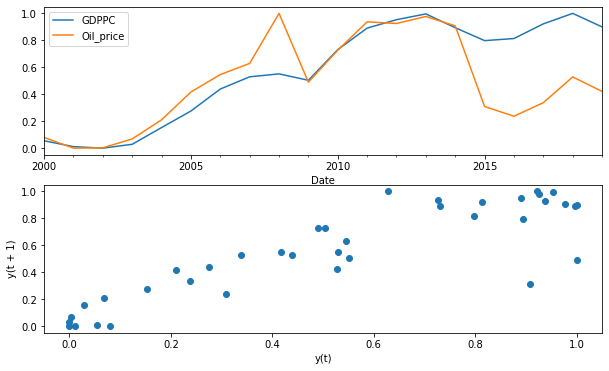

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
Chile_df_scaled.plot(ax = ax1)
pd.plotting.lag_plot(Chile_df_scaled) 
plt.show()

In [ ]:
# taking the log of the data

Chile_df_log = np.log(Chile_df)

In [ ]:
# Linear regression 

reg2 = 'GDPPC ~ Oil_price'

reg2ouput = smf.ols(reg1, Chile_df_log).fit()

print(reg2ouput.summary())

                            OLS Regression Results                            
Dep. Variable:                  GDPPC   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     31.42
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           2.55e-05
Time:                        11:26:46   Log-Likelihood:                -2.3427
No. Observations:                  20   AIC:                             8.685
Df Residuals:                      18   BIC:                             10.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8511      0.604      9.694      0.0

In [ ]:
# Testing regression residuals for stationarity

adf_test(reg2ouput.resid)

Augmented Dickey-Fuller Test: 
ADF test statistic       1.113335
p-value                  0.995329
# lags used              8.000000
# observations          11.000000
critical value (1%)     -4.223238
critical value (5%)     -3.189369
critical value (10%)    -2.729839
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
#Granger causality

grangers_causation_matrix(Chile_df_scaled, variables = Chile_df.columns)

,GDPPC_x,Oil_price_x
GDPPC_y,1.0,0.0001
Oil_price_y,0.0,1.0000


In [ ]:
# Test of stationarity

adf_test(Chile_df_log['GDPPC'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.811287
p-value                  0.002794
# lags used              8.000000
# observations          11.000000
critical value (1%)     -4.223238
critical value (5%)     -3.189369
critical value (10%)    -2.729839
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(Chile_df_log['Oil_price'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.785477
p-value                  0.823351
# lags used              8.000000
# observations          11.000000
critical value (1%)     -4.223238
critical value (5%)     -3.189369
critical value (10%)    -2.729839
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
# Taking the first difference to make data stationary
Chile_diff = Chile_df_log.diff(2) 

In [ ]:
adf_test(Chile_diff['GDPPC'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.447819
p-value                  0.559149
# lags used              7.000000
# observations          10.000000
critical value (1%)     -4.331573
critical value (5%)     -3.232950
critical value (10%)    -2.748700
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
adf_test(Chile_diff['Oil_price'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.602408e+01
p-value                 6.158848e-29
# lags used             7.000000e+00
# observations          1.000000e+01
critical value (1%)    -4.331573e+00
critical value (5%)    -3.232950e+00
critical value (10%)   -2.748700e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
#Initiate VAR model and selecting an optimal lag order

model_ch = VAR(endog=Chile_df_log)
res_ch = model_ch.select_order(5)
res_ch.summary()

,AIC,BIC,FPE,HQIC
0,-5.449,-5.355,0.004301,-5.450
1,-8.134,-7.851,0.0002966,-8.137
2,-8.355,-7.883*,0.0002480*,-8.360
3,-7.935,-7.275,0.0004184,-7.943
4,-7.673,-6.824,0.0006751,-7.682
5,-8.874*,-7.835,0.0003148,-8.885*


In [ ]:
#Fit to a VAR model

model_fit_ch = model_ch.fit(maxlags=5)
#Print a summary of the model results
model_fit_ch.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jan, 2022
Time:                     11:33:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -7.83522
Nobs:                     15.0000    HQIC:                  -8.88476
Log likelihood:           45.9846    FPE:                0.000314846
AIC:                     -8.87370    Det(Omega_mle):     0.000104793
--------------------------------------------------------------------
Results for equation GDPPC
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                3.976133         1.900064            2.093           0.036
L1.GDPPC             1.296411         0.495959            2.614           0.009
L1.Oil_price        -0.235929         0.150336           -1.569 

In [ ]:
cointegration_test(Chile_df_log)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
GDPPC  ::  24.96     > 12.3212   =>   True
Oil_price ::  0.0       > 4.1296    =>   False


In [ ]:
# cointegration with trace test

import statsmodels

vec_rank1 = statsmodels.tsa.vector_ar.vecm.select_coint_rank(Chile_df_log, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          22.95          23.15
-------------------------------------


In [ ]:
# cointegration with maximum eigenvalue test

vec_rank2 = statsmodels.tsa.vector_ar.vecm.select_coint_rank(Chile_df_log, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          15.40          21.75
-------------------------------------


In [ ]:
# Implementing the vector error correction model

model_ch_vecm = VECM(Chile_df_log, k_ar_diff=5, coint_rank=1)
vecm_res_ch = model_ch_vecm.fit()
vecm_res_ch.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.GDPPC,0.5501,0.349,1.577,0.115,-0.134,1.234
L1.Oil_price,0.1566,0.230,0.682,0.495,-0.293,0.607
L2.GDPPC,-1.5995,0.903,-1.772,0.076,-3.369,0.170
L2.Oil_price,0.4936,0.238,2.075,0.038,0.027,0.960
L3.GDPPC,-1.3271,0.531,-2.497,0.013,-2.369,-0.285
L3.Oil_price,0.4237,0.197,2.146,0.032,0.037,0.810
L4.GDPPC,-0.1021,0.343,-0.298,0.766,-0.774,0.569
L4.Oil_price,0.5381,0.280,1.923,0.054,-0.010,1.086
L5.GDPPC,-1.9554,1.029,-1.900,0.057,-3.973,0.062
L5.Oil_price,0.9054,0.425,2.130,0.033,0.072,1.739


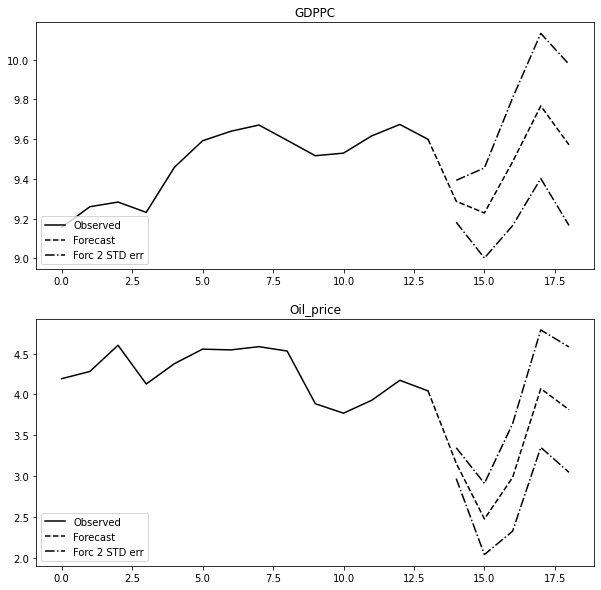

In [ ]:
# Focasting for next five years

vecm_res_ch.plot_forecast(steps=5)

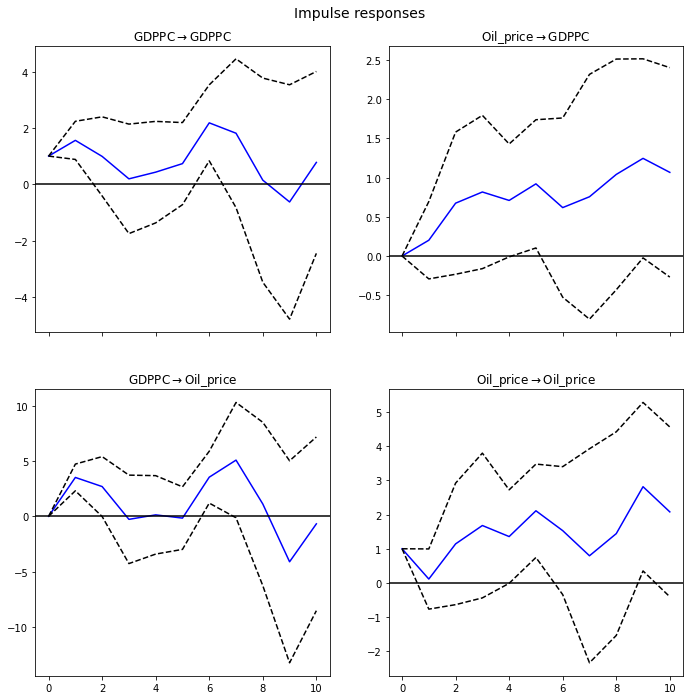

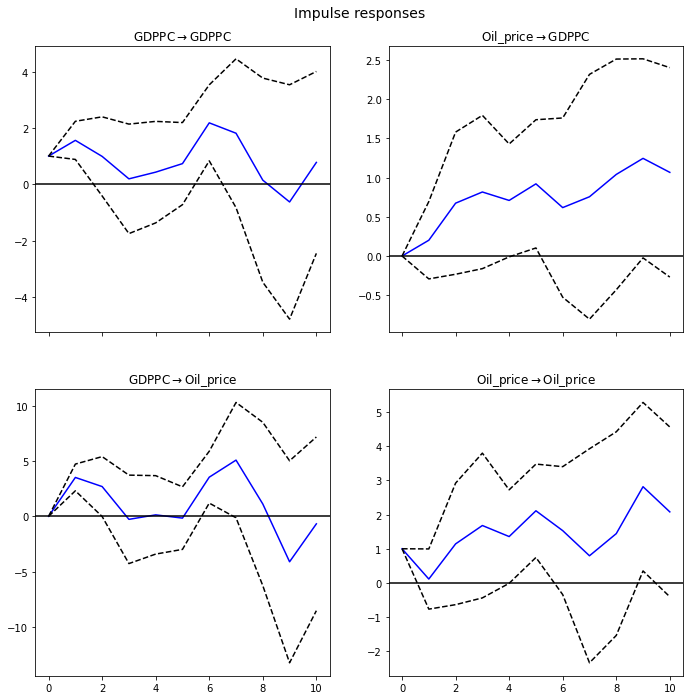

In [ ]:
# Impuluse respose functions 

vecm_res_ch.irf().plot(orth=False)

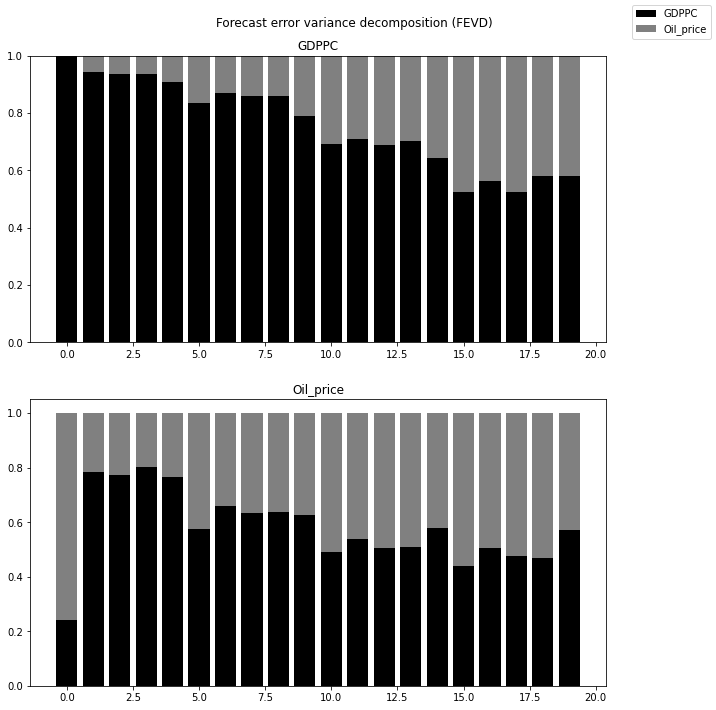

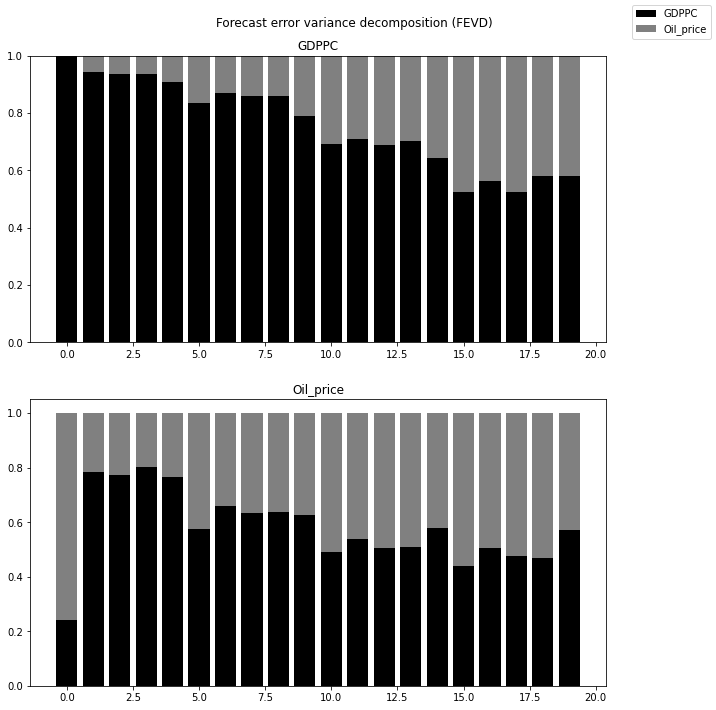

In [ ]:
model_fit_ch.fevd(20).plot()

In [ ]:
vecm_res.test_normality().summary()

Test statistic,Critical value,p-value,df
1.216,9.488,0.875,4


In [ ]:
vecm_res.test_whiteness().summary()

Test statistic,Critical value,p-value,df
56.11,28.87,0.000,18


#  Getting data for SVAR analysis

Data for Colombia

In [ ]:
# importing oil price data

oil_df = yf.download("CL=F", 
                      start='2000-09-23', 
                      end='2020-01-31', 
                      progress=True)

oil_prices = oil_df[['Close']].resample('Y').mean()
oil_prices.index = pd.date_range("2000-01-01", periods=21, freq="Y")
oil_prices.reset_index()
oil_prices.head()

[*********************100%***********************]  1 of 1 completed


,Close
2000-12-31,31.843731
2001-12-31,25.960405
2002-12-31,26.150440
2003-12-31,30.994400
2004-12-31,41.469076


In [ ]:
oil_prices.shape

In [ ]:
# GDP per capita data for colombia

# NY.GDP.PCAP.CD	GDP per capita (current US$)


Gdppc_df = wb.data.DataFrame('NY.GDP.PCAP.CD',
                  ('COL'),
                  time = range(2000,2021), numericTimeKeys=True, 
                  labels=True).set_index('Country').transpose()

Gdppc_df.index = pd.date_range("2000-01-01", periods=21, freq="Y")
Gdppc_df = Gdppc_df.rename(columns={'Colombia': 'GDPPC'})
Gdppc_df.index.names = ['Date']
Gdppc_df.head()

Country,GDPPC
Date,
2000-12-31,2520.481089
2001-12-31,2439.682456
2002-12-31,2396.627127
2003-12-31,2281.401762
2004-12-31,2782.623185


In [ ]:
Gdppc_df.shape

(21, 1)

In [ ]:
# CPI

# COLCPALTT01GPM
#FPCPITOTLZGCOL

start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2021, 1, 1)

CPI = pdr.DataReader('FPCPITOTLZGCOL', 'fred', start, end)
#CPI = CPI[['COLCPALTT01GPM']].resample('Y').mean()
CPI.index = pd.date_range("2000-01-01", periods=21, freq="Y")
CPI.head()

,FPCPITOTLZGCOL
2000-12-31,9.222571
2001-12-31,7.969703
2002-12-31,6.351925
2003-12-31,7.130742
2004-12-31,5.901262


In [ ]:
CPI.shape

(21, 1)

In [ ]:
# Interest rate
#COLIR3TCD01STM

start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2020, 1, 31)

IR = pdr.DataReader('COLIR3TCD01STM', 'fred', start, end)
IR = IR[['COLIR3TCD01STM']].resample('Y').mean()
IR.index = pd.date_range("2000-01-01", periods=21, freq="Y")
IR.head()

,COLIR3TCD01STM
2000-12-31,12.146667
2001-12-31,12.435000
2002-12-31,8.938333
2003-12-31,7.803333
2004-12-31,7.798333


In [ ]:
IR.shape

(21, 1)

In [ ]:
# Production index

start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2020, 1, 31)

PrIdx = pdr.DataReader('COLPRMNTO01IXOBSAM', 'fred', start, end)
PrIdx = PrIdx[['COLPRMNTO01IXOBSAM']].resample('Y').mean()
PrIdx.index = pd.date_range("2000-01-01", periods=21, freq="Y")
PrIdx.head()

,COLPRMNTO01IXOBSAM
2000-12-31,77.391315
2001-12-31,72.099509
2002-12-31,72.064096
2003-12-31,73.485016
2004-12-31,77.637112


In [ ]:
PrIdx.shape

In [ ]:
# combining datasets
 

Colombia_df2 = pd.concat([oil_prices, Gdppc_df , CPI, IR, PrIdx], axis=1)
Colombia_df2.dropna()
Colombia_df2.index.name='Date'
Colombia_df2.set_axis(['Oil_price', 'GDPPC', 'CPI', 'IR', 'PrIdx'], axis=1, inplace=True)
Colombia_df2.head()

,Oil_price,GDPPC,CPI,IR,PrIdx
Date,,,,,
2000-12-31,31.843731,2520.481089,9.222571,12.146667,77.391315
2001-12-31,25.960405,2439.682456,7.969703,12.435000,72.099509
2002-12-31,26.150440,2396.627127,6.351925,8.938333,72.064096
2003-12-31,30.994400,2281.401762,7.130742,7.803333,73.485016
2004-12-31,41.469076,2782.623185,5.901262,7.798333,77.637112


In [ ]:
# exporting data

Colombia_df2.to_csv('data_colombia', sep=',')

Data for Chile

In [ ]:
# GDP per capita data for Chile

# NY.GDP.PCAP.CD	GDP per capita (current US$)


Gdppc_df_chile = wb.data.DataFrame('NY.GDP.PCAP.CD',
                  ('CHL'),
                  time = range(2000,2021), numericTimeKeys=True, 
                  labels=True).set_index('Country').transpose()

Gdppc_df_chile.index = pd.date_range("2000-01-01", periods=21, freq="Y")
Gdppc_df_chile = Gdppc_df_chile.rename(columns={'Chile': 'GDPPC'})
Gdppc_df_chile.index.names = ['Date']
Gdppc_df_chile.head()

Country,GDPPC
Date,
2000-12-31,5074.902616
2001-12-31,4574.594716
2002-12-31,4446.249371
2003-12-31,4772.563723
2004-12-31,6194.852720


In [ ]:
Gdppc_df_chile.shape

(21, 1)

In [ ]:
# CPI

#FPCPITOTLZGCOL

start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2021, 1, 1)

CPI_chile = pdr.DataReader('FPCPITOTLZGCHL', 'fred', start, end)
CPI_chile.index = pd.date_range("2000-01-01", periods=21, freq="Y")
CPI_chile.head()

,FPCPITOTLZGCHL
2000-12-31,3.843273
2001-12-31,3.569101
2002-12-31,2.489398
2003-12-31,2.810179
2004-12-31,1.054739


In [ ]:
CPI_chile.shape

(21, 1)

In [ ]:
# Interest rate
#IR3TIB01CLM156N

start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2020, 1, 31)

IR_chile = pdr.DataReader('IR3TIB01CLM156N', 'fred', start, end)
IR_chile = IR_chile[['IR3TIB01CLM156N']].resample('Y').mean()
IR_chile.index = pd.date_range("2000-01-01", periods=21, freq="Y")
IR_chile.head()

,IR3TIB01CLM156N
2000-12-31,10.757500
2001-12-31,7.233333
2002-12-31,3.925000
2003-12-31,2.767500
2004-12-31,1.830000


In [ ]:
IR_chile.shape

(21, 1)

In [ ]:
# Production index
#PRMNTO01CLQ661N

start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2020, 1, 31)

PrIdx_chile = pdr.DataReader('PRMNTO01CLQ661N', 'fred', start, end)
PrIdx_chile = PrIdx_chile[['PRMNTO01CLQ661N']].resample('Y').mean()
PrIdx_chile.index = pd.date_range("2000-01-01", periods=21, freq="Y")
PrIdx_chile.head()

,PRMNTO01CLQ661N
2000-12-31,70.091014
2001-12-31,71.362094
2002-12-31,72.657386
2003-12-31,76.428258
2004-12-31,83.116563


In [ ]:
PrIdx_chile.shape

(21, 1)

In [ ]:
# combining datasets
 

Chile_df2 = pd.concat([oil_prices, Gdppc_df_chile , CPI_chile, IR_chile, PrIdx_chile], axis=1)
Chile_df2.dropna()
Chile_df2.index.name='Date'
Chile_df2.set_axis(['Oil_price', 'GDPPC', 'CPI', 'IR', 'PrIdx'], axis=1, inplace=True)
Chile_df2.head()

,Oil_price,GDPPC,CPI,IR,PrIdx
Date,,,,,
2000-12-31,31.843731,5074.902616,3.843273,10.757500,70.091014
2001-12-31,25.960405,4574.594716,3.569101,7.233333,71.362094
2002-12-31,26.150440,4446.249371,2.489398,3.925000,72.657386
2003-12-31,30.994400,4772.563723,2.810179,2.767500,76.428258
2004-12-31,41.469076,6194.852720,1.054739,1.830000,83.116563


In [ ]:
# exporting data

Chile_df2.to_csv('data_chile', sep=',')

**The SVR analysis is implemented in the attached R notebook**